In [133]:
%%timeit
import os
from matplotlib.pyplot import imread

# specifiy the CelebA folder
dirname = "./Data/img_align_celeba/img_align_celeba"

files = [filename for (dirpath, dirnames, filenames) in os.walk(dirname)
                  for filename in filenames if filename[-4:] == ".jpg"]

if len(files) == 0:
    print ("ERROR: wrong folder")
    import sys  
    sys.exit(1)
    
print('Total number of celebA images is : ', len(files))
print('First 10 files are:')
for i, filename in enumerate(files):
    if i < 10:
         print(filename)

Total number of celebA images is :  202599
First 10 files are:
000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
000010.jpg
Total number of celebA images is :  202599
First 10 files are:
000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
000010.jpg
Total number of celebA images is :  202599
First 10 files are:
000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
000010.jpg
Total number of celebA images is :  202599
First 10 files are:
000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
000010.jpg
Total number of celebA images is :  202599
First 10 files are:
000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
000010.jpg
Total number of celebA images is :  202599
First 10 files are:
000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007

# Plot the pixel values of the image

In [157]:
%%timeit
import torch
import torchvision
import imageio.v2 as imageio
import torchvision.transforms as T
from PIL import Image

# downsample the resolution by subx and suby
subx, suby = 1, 1 # 1,1==> no downsample
dimx, dimy = int((218+subx-1)/subx), int((178+suby-1)/suby)

total_number_of_faces = 1

data = torch.zeros(total_number_of_faces, dimx*dimy*3, dtype=torch.uint8)

for index, filename in enumerate(files):
    if index == total_number_of_faces:
        break
    # if no downsample 
    data[index] = torch.from_numpy(imageio.imread(dirname+"/"+filename).flatten()) 
    # if downsample
    #data[index] = imread(dirname+filename)[::subx,::suby].flatten()    

720 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Plot pixel image values

CPU times: total: 3.03 s
Wall time: 1.21 s


Text(0.5, 1.0, 'distribution of pixels')

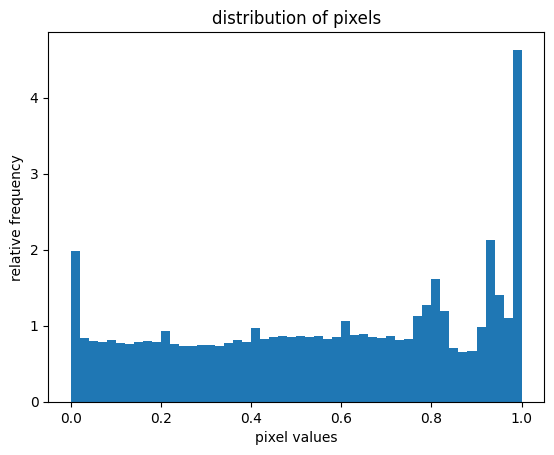

In [176]:
%%time
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np

face_dimensions = 218*178*3

transform = transforms.Compose([
    transforms.ToTensor()
])

transformed_data = transform(np.array(data[0].reshape(218,178,3)))


# plot the pixel values
plt.hist(transformed_data.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [175]:
mean, std = transformed_data.mean([1,2]), transformed_data.std([1,2])


# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: tensor([0.5597, 0.5595, 0.5585])
Std of the image: tensor([0.3156, 0.3154, 0.3157])


TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


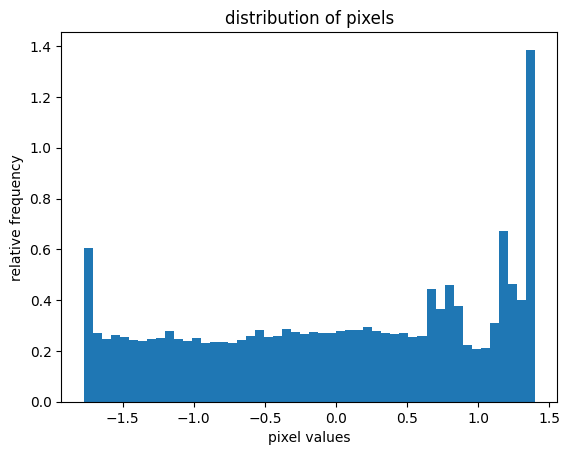

In [181]:
normalize = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

normalized_data = normalize(np.array(data[0].reshape(218,178,3)))

# plot the pixel values
plt.hist(normalized_data.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

plt.imshow(normalized_data.transpose(1, 2, 0))